# Question 1 - Anaalysis 1

Problem - Find out top 15 domains with highest outgoing traffic.Please Run the last block directly. Proceesed data is stored in a csv.

In [2]:
import email
import os
import functools
import itertools
import matplotlib.pyplot as plt
import operator

Collecting path variables. Please change the value of rpath according to your machine.

In [3]:
rpath="C:/Users/Ankit Mahajan/Documents/Python Scripts/"
path="midterm/data/enron/maildir"
root = rpath+path

Defining a function that filters email recipients and separates different domain names from email addresses

In [4]:
def addtodictionary(raw_email):
    email_message = email.message_from_string(raw_email)
    for to in str(email_message['To']).split(','):
        #filtering all the mails that haven't gone to enron internally
        if to.endswith("@enron.com") is False and to != "None":
            k = to.split("@",1)[1]
            if k in datatoanalyse:
                datatoanalyse[k] +=1
            else:
                datatoanalyse[k] = 1

Iterating through different sent emails in each user

In [5]:
datatoanalyse = {}
for subdir, dirs, files in os.walk(root):
    if subdir.endswith("_sent_mail"):
        for file in files:
            with open(subdir+"/"+file, 'r') as f:
                addtodictionary(f.read())

Sorting the values and preparing data for visualization

In [11]:
freq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)[:15]
freq.reverse()
labels, values = zip(*freq)

Plotting graph of the calculatesd values

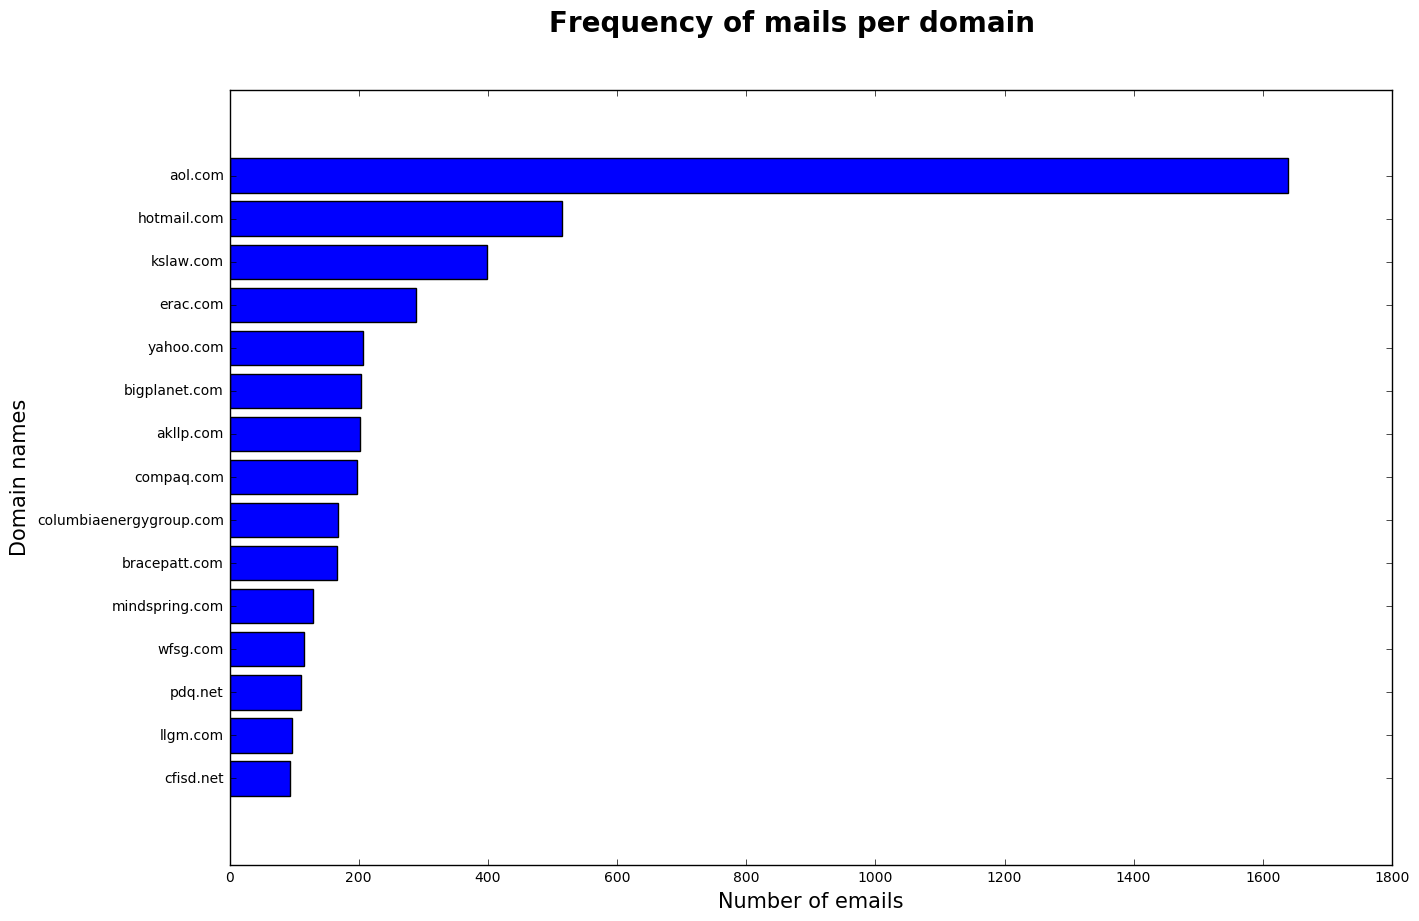

In [25]:
plt.barh(range(len(values)), values, align='center')
plt.yticks(range(len(labels)), labels)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.suptitle('Frequency of mails per domain' , fontsize=20, fontweight='bold')
plt.ylabel("Domain names", fontsize=15)
plt.xlabel("Number of emails", fontsize=15)
plt.show()

Displaying top 10 amongst them

In [14]:
freq.reverse()

In [26]:
print("Top 15 domains with highest outgoing traffic are- \nDomain name: Number of mails")
for r in freq:
    print(r[0], " : ",r[1])

Top 15 domains with highest outgoing traffic are- 
Domain name: Number of mails
aol.com  :  1639
hotmail.com  :  515
kslaw.com  :  398
erac.com  :  289
yahoo.com  :  207
bigplanet.com  :  203
akllp.com  :  202
compaq.com  :  197
columbiaenergygroup.com  :  168
bracepatt.com  :  167
mindspring.com  :  129
wfsg.com  :  116
pdq.net  :  110
llgm.com  :  96
cfisd.net  :  94


Storing data to a csv fro future referrence

In [30]:
import csv
wfreq = sorted(datatoanalyse.items(), key=operator.itemgetter(1), reverse=True)
with open("Analysis 1"+'.csv','w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Domain","Frequency"])
    for r in wfreq:
        writer.writerow([r[0],r[1]])

Please run this block directly

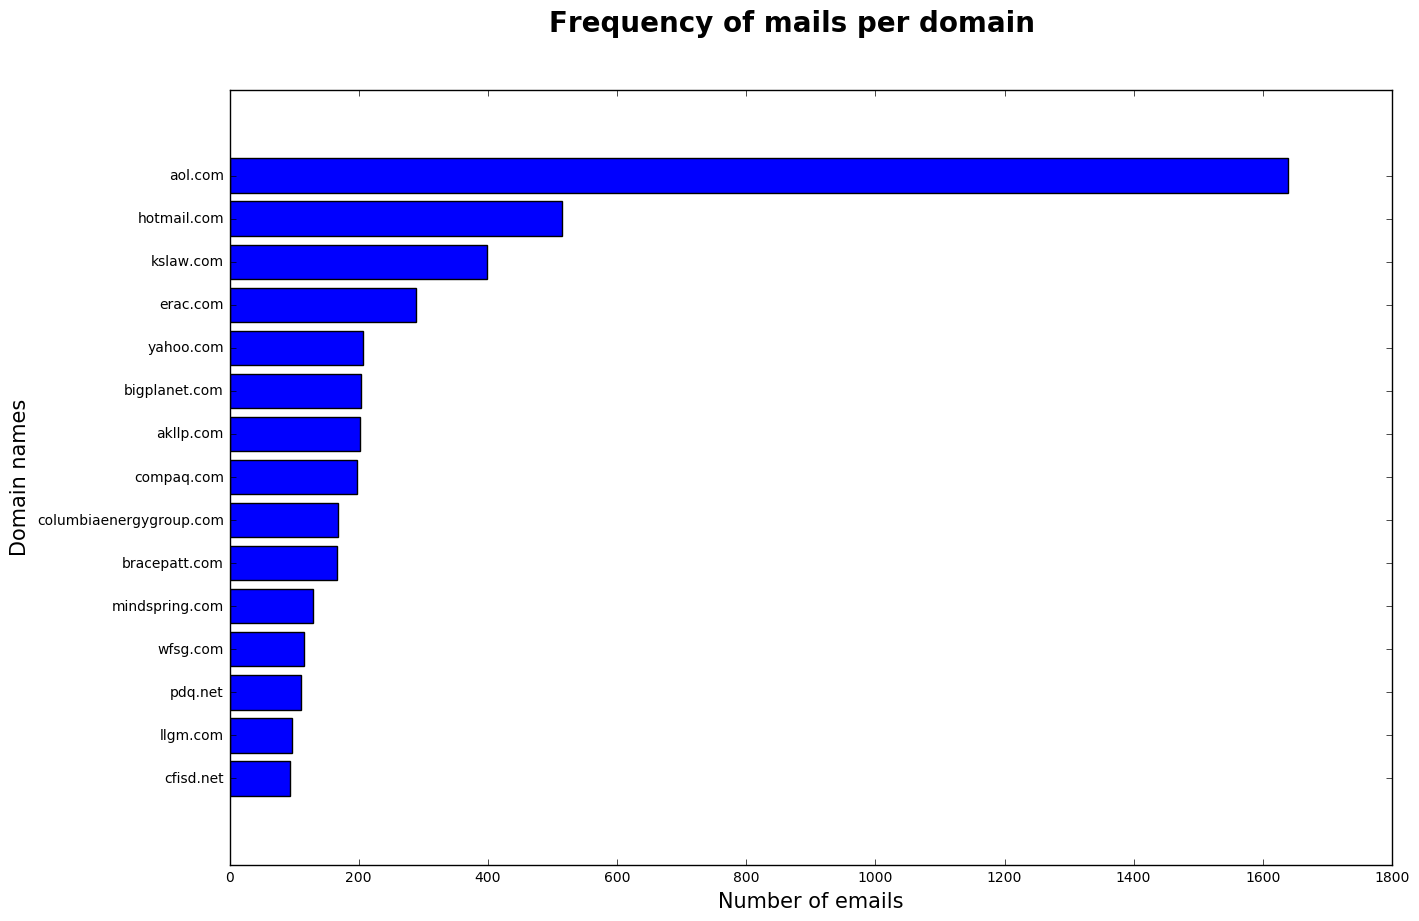

In [34]:
freq = {}
with open('Analysis 1.csv') as f:
    reader = csv.DictReader(f)
    i= 0
    for r in reader:
        if i == 15:break
        freq[r['Domain']] = int(r['Frequency'])
        i+=1
freq = sorted(freq.items(), key=operator.itemgetter(1))
labels, values = zip(*freq)
plt.barh(range(len(freq)), values, align='center')
plt.yticks(range(len(freq)), labels)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.suptitle('Frequency of mails per domain' , fontsize=20, fontweight='bold')
plt.ylabel("Domain names", fontsize=15)
plt.xlabel("Number of emails", fontsize=15)
plt.show()